Enunciado
Red neuronal

## EJERCICIO

En este reto, tu objetivo es utilizar una red neuronal para predecir la salida de la compuerta lógica XOR. La compuerta XOR es un problema clásico en el ámbito de las redes neuronales debido a su naturaleza no lineal y su capacidad para ilustrar la importancia de las capas ocultas en una red.

Implementa una red neuronal desde cero utilizando Python y operaciones de matrices. Tu red neuronal debe tener una capa de entrada con dos neuronas, una capa oculta con dos neuronas y una capa de salida con una neurona. Entrena tu red neuronal utilizando los datos de entrada y salida proporcionados para la compuerta XOR.

inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

outputs = np.array([[0], [1], [1], [0]])

Ajusta los pesos y sesgos de la red mediante el algoritmo de retropropagación y la optimización del descenso del gradiente. Una vez entrenada la red neuronal, evalúa su rendimiento utilizando diferentes conjuntos de entrada para la compuerta XOR.

Debes realizar un programa en Python en donde se implemente la red neuronal, sin usar ninguna biblioteca de aprendizaje de máquina (Sckit Learn o Tensor Flow). Se quiere medir la variación de las salidas respecto a la variación de dos hiper parámetros que son: la tasa de aprendizaje y el número de épocas. La tasa es un numero decimal que varía entre 0 y 1. El número de épocas es un valor entero positivo entre 1 y 10000.

Nota: para iniciar los pesos utilice una semilla es 1 np.random.seed(1)

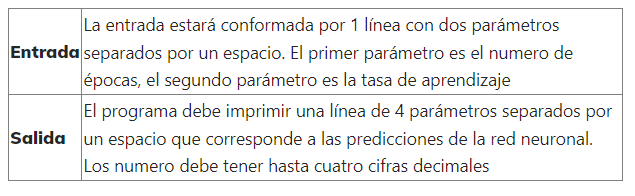

In [1]:
import numpy as np

class Neurona:
    def __init__(self, input_size, size_hidden, size_output, learning_rate):
        # Fijar la semilla para obtener los mismos valores de pesos y sesgos en cada ejecución
        np.random.seed(1)

        # Inicializar los pesos y sesgos con valores aleatorios
        self.hidden_weight = np.random.rand(input_size, size_hidden)
        self.output_weight = np.random.rand(size_hidden, size_output)
        self.bias_hidden = np.random.rand(1, size_hidden)
        self.bias_output = np.random.rand(1, size_output)

        # Configurar la tasa de aprendizaje
        self.learning_rate = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, inputs):
        self.hidden_input = np.dot(inputs, self.hidden_weight) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)

        self.final_input = np.dot(self.hidden_output, self.output_weight) + self.bias_output
        self.output = self.sigmoid(self.final_input)

        return self.output

    def backpropagation(self, inputs, expected_output):
        # Error en la capa de salida
        error = expected_output - self.output

        # Cálculo del gradiente de la capa de salida
        output_gradient = error * self.sigmoid_derivative(self.output)

        # Cálculo del gradiente de la capa oculta (retropropagación)
        hidden_gradient = output_gradient.dot(self.output_weight.T) * self.sigmoid_derivative(self.hidden_output)

        # Actualización de los pesos y sesgos para la capa de salida
        self.output_weight += self.hidden_output.T.dot(output_gradient) * self.learning_rate
        self.bias_output += np.sum(output_gradient, axis=0, keepdims=True) * self.learning_rate

        # Actualización de los pesos y sesgos para la capa oculta
        self.hidden_weight += inputs.T.dot(hidden_gradient) * self.learning_rate
        self.bias_hidden += np.sum(hidden_gradient, axis=0, keepdims=True) * self.learning_rate

    def train(self, inputs, expected_output, epochs):
        for _ in range(epochs):
            self.forward(inputs)
            self.backpropagation(inputs, expected_output)

e, l = input().split()
e = int(e)
l = float(l)

inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
expected_output = np.array([[0], [1], [1], [0]])

nn = Neurona(input_size=2, size_hidden=2, size_output=1, learning_rate=l)

nn.train(inputs, expected_output, epochs=e)

output = nn.forward(inputs)

formatted_output = " ".join(f"{x[0]:.4f}" for x in output)
print(formatted_output)


1000 0.1
0.5005 0.5013 0.5003 0.5009
